In [189]:
import statsmodels.api as sm

In [283]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [246]:
X = pd.DataFrame(np.linspace(1,1000,1000))
y=X.pow(2)

In [247]:
model = sm.OLS(y,X)
res = model.fit()
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 1.499e+04
Date:                Wed, 08 Nov 2017   Prob (F-statistic):               0.00
Time:                        11:48:08   Log-Likelihood:                -13045.
No. Observations:                1000   AIC:                         2.609e+04
Df Residuals:                     999   BIC:                         2.610e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0            750.3748      6.130    122.413      0.0

In [248]:
y_hat = res.predict(X)

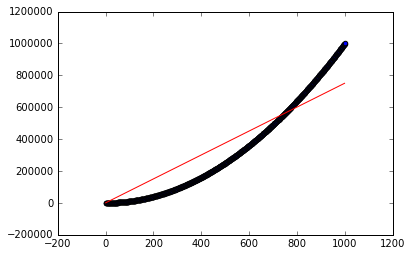

In [249]:
plt.scatter(X,y)
plt.plot(y_hat,'r')

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)

In [289]:
param_hidden_layers = [(2,),(5,),(8,),(10,),(20,)]
n_folds = 5
kf = KFold(n_splits=n_folds)

In [277]:
?MLPRegressor

In [319]:
for param_hidden in param_hidden_layers:
    aRMSE = 0
    for train_idx, test_idx in kf.split(X_train):
        regMLP = MLPRegressor(activation = 'relu',
                              solver = 'lbfgs',
                              learning_rate='constant',
                              random_state=42,
                              batch_size=20,
                              learning_rate_init = 0.001,
                              hidden_layer_sizes = param_hidden)
        stdScaler = StandardScaler()
        xTrain = stdScaler.fit_transform(X_train.iloc[train_idx,:])
        yTrain = y_train.iloc[train_idx]
            
        regMLP.fit(xTrain,yTrain)
        aRMSE += np.sqrt(mean_squared_error(y_train.iloc[test_idx],
                                            regMLP.predict(stdScaler.transform(X_train.iloc[test_idx,:]))))/n_folds
    print '<hidden layer: {}>\n Average RMSE (CV): {}\n'.format(param_hidden,aRMSE)

<hidden layer: (2,)>
 Average RMSE (CV): 245278.438235

<hidden layer: (5,)>
 Average RMSE (CV): 12136.6827007

<hidden layer: (8,)>
 Average RMSE (CV): 3358.73256256

<hidden layer: (10,)>
 Average RMSE (CV): 3518.11902626

<hidden layer: (20,)>
 Average RMSE (CV): 1082.65331741



In [320]:
RMSE_train_test = {}
regMLPs = {}
r2_scores = {}
for param_hidden in param_hidden_layers:
    regMLP = MLPRegressor(activation = 'relu',
                          solver = 'lbfgs',
                          learning_rate='constant',
                          random_state=42,
                          batch_size=40,
                          learning_rate_init = 0.001,
                          hidden_layer_sizes = param_hidden)
    stdScaler = StandardScaler()
    xTrain = stdScaler.fit_transform(X_train)
    regMLP.fit(xTrain,y_train)
    RMSE_train_test[param_hidden] = [np.sqrt(mean_squared_error(y_train,regMLP.predict(xTrain))),
                                     np.sqrt(mean_squared_error(y_test,regMLP.predict(stdScaler.transform(X_test))))]
    r2_scores[param_hidden] = [r2_score(y_train,regMLP.predict(xTrain)),
                               r2_score(y_test,regMLP.predict(stdScaler.transform(X_test)))]
    regMLPs[param_hidden] = regMLP
    
    print '<hidden layer: {}>\n RMSE (Train) = {}, RMSE (Test) = {}\n r2_score (Train) = {}, r2_score(Test)={}\n'.format(param_hidden,
                                                                                                                         RMSE_train_test[param_hidden][0],
                                                                                                                         RMSE_train_test[param_hidden][1],
                                                                                                                         r2_scores[param_hidden][0],
                                                                                                                         r2_scores[param_hidden][1])

<hidden layer: (2,)>
 RMSE (Train) = 297968.361284, RMSE (Test) = 299344.406529
 r2_score (Train) = -6.66133814775e-16, r2_score(Test)=-8.74648702653e-05

<hidden layer: (5,)>
 RMSE (Train) = 11940.1618607, RMSE (Test) = 11998.6860903
 r2_score (Train) = 0.998394241893, r2_score(Test)=0.99839319538

<hidden layer: (8,)>
 RMSE (Train) = 3711.04883431, RMSE (Test) = 3844.61222486
 r2_score (Train) = 0.999844885273, r2_score(Test)=0.999835031596

<hidden layer: (10,)>
 RMSE (Train) = 4327.0006802, RMSE (Test) = 4403.77919637
 r2_score (Train) = 0.99978912086, r2_score(Test)=0.999783555398

<hidden layer: (20,)>
 RMSE (Train) = 980.51958172, RMSE (Test) = 1153.89690013
 r2_score (Train) = 0.999989171402, r2_score(Test)=0.999985139627



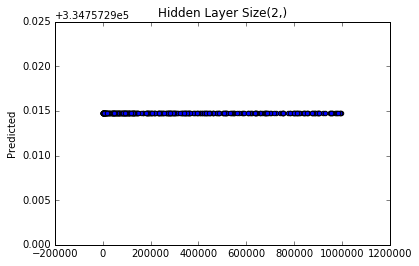

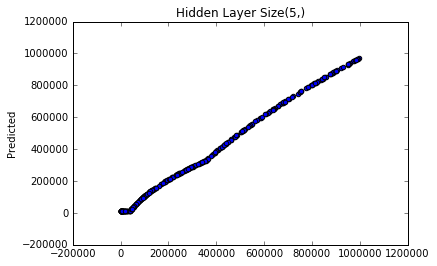

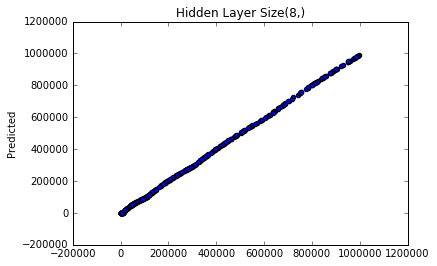

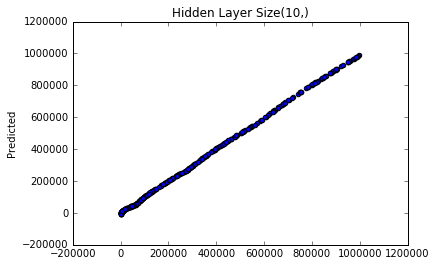

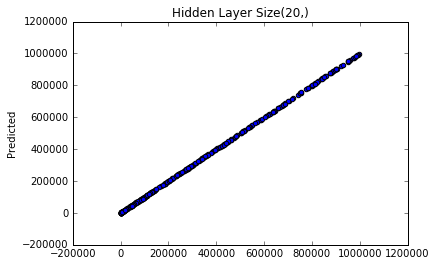

In [321]:
for param_hidden in param_hidden_layers:
    y_hat = regMLPs[param_hidden].predict(stdScaler.transform(X_test))
 
    fig, ax=plt.subplots()
    plt.scatter(y_test,y_hat)
    plt.ylabel('Measured')
    plt.ylabel('Predicted')
    plt.title('Hidden Layer Size{}'.format(param_hidden))
    #plt.ylim(y_test.min(),y_test.max())
    #plt.xlim(y_test.min(),y_test.max())
    #plt.plot([-.15,.15],[-.15,.15], 'k--')

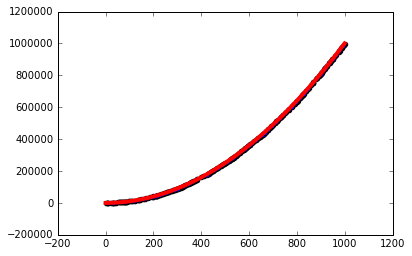

In [322]:
plt.scatter(X_test,regMLPs[(20,)].predict(stdScaler.transform(X_test)))
plt.plot(y,'r', lw=4)